In [2]:
import scipy
import numpy as np
import pandas as pd
from learner import learner
from hw2_resources.plotBoundary import *
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set_style('white')
%matplotlib inline

In [3]:
def mnist_data(i):
    return 'hw2_resources/data/mnist_digit_' + str(i) + '.csv'

In [4]:
def read_mnist(first_class, second_class, cuts, scale = False):
    n_features   = 784

    X_train = np.empty((0, n_features), int)
    Y_train = np.empty((0, 1), int)
    X_val   = np.empty((0, n_features), int)
    Y_val   = np.empty((0, 1), int)
    X_test  = np.empty((0, n_features), int)
    Y_test  = np.empty((0, 1), int)

    for i in first_class:
        add     = np.loadtxt(mnist_data(i))
        
        X_train = np.append(X_train, add[0:cuts[0]], axis = 0)
        Y_train = np.append(Y_train, np.ones((cuts[0], 1)), axis = 0)
        X_val   = np.append(X_val,   add[(cuts[0]):(cuts[0] + cuts[1])], axis = 0)
        Y_val   = np.append(Y_val,   np.ones((cuts[1], 1)), axis = 0)
        X_test  = np.append(X_test,  add[(cuts[0] + cuts[1]):(cuts[0] + cuts[1] + cuts[2])], axis = 0)
        Y_test  = np.append(Y_test,  np.ones((cuts[2], 1)), axis = 0)

    for i in second_class:
        add = np.loadtxt(mnist_data(i))
        X_train = np.append(X_train, add[0:cuts[0]], axis = 0)
        Y_train = np.append(Y_train, -np.ones((cuts[0], 1)), axis = 0)
        X_val   = np.append(X_val,   add[cuts[0]:(cuts[0] + cuts[1])], axis = 0)
        Y_val   = np.append(Y_val,   -np.ones((cuts[1], 1)), axis = 0)
        X_test  = np.append(X_test,  add[(cuts[0] + cuts[1]):(cuts[0] + cuts[1] + cuts[2])], axis = 0)
        Y_test  = np.append(Y_test,  -np.ones((cuts[2], 1)), axis = 0)
    
    if scale:
        X_train = 2.0 * X_train / 255 - 1
        X_val   = 2.0 * X_val / 255 - 1
        X_test  = 2.0 * X_test / 255 - 1
        
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [5]:
cuts = [200, 150, 150]

X_train, Y_train, X_val, Y_val, X_test, Y_test = read_mnist([1], [9], cuts)

In [6]:
import time

svm = learner()
svm.set_data(X_train,Y_train)

start = time.time()
svm.set_kernel('rbf')
svm.make_kernel_matrix(gamma = .0000001)
end = time.time()
print(end - start)

start = time.time()

svm.train(1)
end = time.time()
print(end - start)

0.0170950889587
0.278961896896


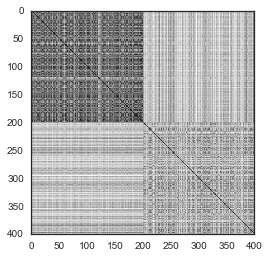

In [7]:
plt.imshow(svm.K)

In [8]:
preds = svm.classify(X_val.T, gamma = .00000001).T
mean(np.abs(Y_val - preds)/2.0)

0.026666666666666668

# Part (a)

,Comparison,Scale,Testing Error,Training Error,Validation Error
0,0,0,0.020000,0.0200,0.023333
0,0,1,0.020000,0.0200,0.023333
0,1,0,0.170000,0.1875,0.216667
0,1,1,0.170000,0.1875,0.216667
0,2,0,0.146667,0.1300,0.093333
0,2,1,0.146667,0.1300,0.093333
0,3,0,0.212667,0.2140,0.221333
0,3,1,0.212667,0.2140,0.221333


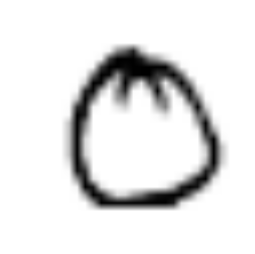

In [8]:
table = pd.DataFrame({'Comparison' : [],
                      'Training Error': [],
                      'Validation Error': [],
                      'Testing Error': [],
                      'Scale': []})

comparisons = [[[1],[9]],
              [[3],[5]],
              [[4],[9]],
              [[0,2,4,6,8], [1,3,5,7,9]]]

for i in np.arange(4):
    for scale in [False, True]:
        X_train, Y_train, X_val, Y_val, X_test, Y_test = read_mnist(comparisons[i][0], 
                                                                    comparisons[i][1], 
                                                                    cuts)
        svm = learner()
        svm.set_sparsity_threshold(10**(-30))
        svm.set_data(X_train,Y_train)

        svm.set_kernel('linear')
        svm.make_kernel_matrix()

        svm.train(.000000000000001)

        train_preds = svm.classify(X_train.T).T
        val_preds   = svm.classify(X_val.T).T
        test_preds  = svm.classify(X_test.T).T

        train_error = mean(np.abs(Y_train - train_preds)/2.0) 
        val_error   = mean(np.abs(Y_val   - val_preds)/2.0) 
        test_error  = mean(np.abs(Y_test  - test_preds)/2.0) 

        plt.imshow(X_val[np.flatnonzero((Y_val < 0)*(Y_val - val_preds))][0].reshape(28, 28))
        plt.gca().axis('off')
        plt.savefig('figs/misclassified_' + str(i) + 'positive.pdf')

        plt.imshow(X_val[np.flatnonzero((Y_val > 0)*(Y_val - val_preds))][0].reshape(28, 28))
        plt.gca().axis('off')
        plt.savefig('figs/misclassified_' + str(i) + 'negative.pdf')

        add = pd.DataFrame({'Comparison' : [i],
                          'Training Error': [train_error],
                          'Validation Error': [val_error],
                          'Testing Error': [test_error],
                           'Scale': [scale]})
        table = table.append(add)
table

# Part (b) 

(1e-10, 1e-10)
(1e-10, 1.0000000000000001e-09)
(1e-10, 1e-08)
(1e-10, 9.9999999999999995e-08)
(1e-10, 9.9999999999999995e-07)
(1.0000000000000001e-09, 1e-10)
(1.0000000000000001e-09, 1.0000000000000001e-09)
(1.0000000000000001e-09, 1e-08)
(1.0000000000000001e-09, 9.9999999999999995e-08)
(1.0000000000000001e-09, 9.9999999999999995e-07)
(1e-08, 1e-10)
(1e-08, 1.0000000000000001e-09)
(1e-08, 1e-08)
(1e-08, 9.9999999999999995e-08)
(1e-08, 9.9999999999999995e-07)
(9.9999999999999995e-08, 1e-10)
(9.9999999999999995e-08, 1.0000000000000001e-09)
(9.9999999999999995e-08, 1e-08)
(9.9999999999999995e-08, 9.9999999999999995e-08)
(9.9999999999999995e-08, 9.9999999999999995e-07)
(9.9999999999999995e-07, 1e-10)
(9.9999999999999995e-07, 1.0000000000000001e-09)
(9.9999999999999995e-07, 1e-08)
(9.9999999999999995e-07, 9.9999999999999995e-08)
(9.9999999999999995e-07, 9.9999999999999995e-07)
(1e-10, 1e-10)
(1e-10, 1.0000000000000001e-09)
(1e-10, 1e-08)
(1e-10, 9.9999999999999995e-08)
(1e-10, 9.99999999999

,C,Comparison,Testing Error,Training Error,Validation Error,gamma
0,1.000000e-10,0,0.086667,0.0950,0.100000,1.000000e-10
0,1.000000e-10,0,0.086667,0.0975,0.100000,1.000000e-09
0,1.000000e-10,0,0.086667,0.0975,0.100000,1.000000e-08
0,1.000000e-10,0,0.083333,0.0925,0.096667,1.000000e-07
0,1.000000e-10,0,0.040000,0.0150,0.043333,1.000000e-06
0,1.000000e-09,0,0.086667,0.0975,0.100000,1.000000e-10
0,1.000000e-09,0,0.086667,0.0975,0.100000,1.000000e-09
0,1.000000e-09,0,0.086667,0.0975,0.100000,1.000000e-08
0,1.000000e-09,0,0.083333,0.0925,0.096667,1.000000e-07
0,1.000000e-09,0,0.040000,0.0150,0.043333,1.000000e-06


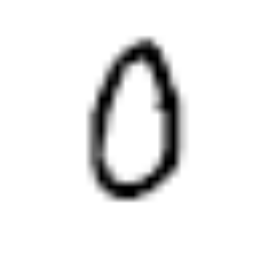

In [11]:
table = pd.DataFrame({'Comparison' : [],
                      'C' : [],
                      'gamma' : [],
                      'Training Error': [],
                      'Validation Error': [],
                      'Testing Error' : []})

comparisons = [[[1],[9]],
              [[3],[5]],
              [[4],[9]],
              [[0,2,4,6,8], [1,3,5,7,9]]]

Cs = [10**i for i in np.arange(-10, -5)]
gammas = [10**i for i in np.arange(-10, -5)]

for i in np.arange(4):
    for C in Cs:
        for gamma in gammas:
            print(C, gamma)

            X_train, Y_train, X_val, Y_val, X_test, Y_test = read_mnist(comparisons[i][0], 
                                                                        comparisons[i][1], 
                                                                        cuts)
            svm = learner()
            svm.set_sparsity_threshold(10**(-30))
            svm.set_data(X_train,Y_train)

            svm.set_kernel('rbf')
            svm.make_kernel_matrix(gamma = gamma)

            svm.train(C)

            train_preds = svm.classify(X_train.T, gamma = gamma).T
            val_preds   = svm.classify(X_val.T, gamma = gamma).T
            test_preds  = svm.classify(X_test.T, gamma = gamma).T

            train_error = mean(np.abs(Y_train - train_preds)/2.0) 
            val_error   = mean(np.abs(Y_val   - val_preds)/2.0) 
            test_error  = mean(np.abs(Y_test  - test_preds)/2.0) 

            try:
                plt.imshow(X_val[np.flatnonzero((Y_val < 0)*(Y_val - val_preds))][0].reshape(28, 28))
                plt.gca().axis('off')
                plt.savefig('figs/gaussian_misclassified_' + str(i) + 'positive.pdf')
            except IndexError:
                pass

            try:
                plt.imshow(X_val[np.flatnonzero((Y_val > 0)*(Y_val - val_preds))][0].reshape(28, 28))
                plt.gca().axis('off')
                plt.savefig('figs/gaussian_misclassified_' + str(i) + 'negative.pdf')
            except IndexError:
                pass

            add = pd.DataFrame({'Comparison' : [i],
                                'C' : [C],
                                'gamma' : [gamma],
                              'Training Error': [train_error],
                              'Validation Error': [val_error],
                              'Testing Error': [test_error]})
            table = table.append(add)
table

In [12]:
table.to_csv('figs/gaussian_svm_summary.csv')

In [24]:
# CV results
idx = table.groupby(['Comparison'])['Validation Error'].transform(max) == table['Validation Error']
table[idx]

,C,Comparison,Testing Error,Training Error,Validation Error,gamma
0,1.000000e-08,0,0.086667,0.0975,0.103333,1.000000e-09
0,1.000000e-07,0,0.086667,0.0975,0.103333,1.000000e-10
0,1.000000e-07,0,0.086667,0.0975,0.103333,1.000000e-09
0,1.000000e-06,0,0.086667,0.0975,0.103333,1.000000e-10
0,1.000000e-06,0,0.086667,0.0975,0.103333,1.000000e-09
0,1.000000e-10,1,0.123333,0.1675,0.196667,1.000000e-09
0,1.000000e-10,2,0.170000,0.1400,0.113333,1.000000e-07
0,1.000000e-10,3,0.315333,0.3030,0.306667,1.000000e-09


# Part (c) 

In [15]:
table = pd.DataFrame({'Comparison' : [],
                      'Lambda' : [],
                      'Epochs' : [],
                      'Training time': [],
                      'Testing Error' : []})

comparisons = [[[1],[9]],
              [[3],[5]],
              [[4],[9]],
              [[0,2,4,6,8], [1,3,5,7,9]]]

lambdas = [.002, 0.02, 0.2, 2]
max_epochs = [1, 5, 20]

C = 10 ** (-6) 
gamma = 10 ** (-6)

for i in np.arange(4):

    X_train, Y_train, X_val, Y_val, X_test, Y_test = read_mnist(comparisons[i][0], 
                                                                comparisons[i][1], 
                                                                cuts)
    svm = learner()
    svm.set_sparsity_threshold(10**(-30))
    svm.set_data(X_train,Y_train)

    svm.set_kernel('rbf')
    svm.make_kernel_matrix(gamma = gamma)
    
    start = time.time()
    svm.train(C)
    end = time.time()
    

    train_preds = svm.classify(X_train.T, gamma = gamma).T
    val_preds   = svm.classify(X_val.T, gamma = gamma).T
    test_preds  = svm.classify(X_test.T, gamma = gamma).T

    train_error = mean(np.abs(Y_train - train_preds)/2.0) 
    val_error   = mean(np.abs(Y_val   - val_preds)/2.0) 
    test_error  = mean(np.abs(Y_test  - test_preds)/2.0) 

    add = pd.DataFrame({'Comparison' : [i],
                        'Lambda' : [''],
                        'Epochs' : [''],
                        'Training time': [end - start],
                        'Testing Error': [test_error]})
    table = table.append(add)
    
    for lamda in lambdas:
        for n_epochs in max_epochs:
            svm.set_kernel('rbf')
            svm.make_kernel_matrix(gamma = gamma)
            
            start = time.time()
            svm.train_pegasos_kernelized(lamda, n_epochs)
            end = time.time()
            
            test_preds  = svm.classify(X_test.T, gamma = gamma).T
            test_error  = mean(np.abs(Y_test  - test_preds)/2.0) 
            
            add = pd.DataFrame({'Comparison' : [i],
                        'Lambda' : [lamda],
                        'Epochs' : [n_epochs],
                        'Training time': [end - start],
                        'Testing Error': [test_error]})
            table = table.append(add)
table.to_csv('figs/p4_c1.csv')

,Comparison,Epochs,Lambda,Testing Error,Training time
0,0,,,0.040000,0.602555
0,0,1,0.002,0.010000,0.084243
0,0,5,0.002,0.020000,0.090772
0,0,20,0.002,0.040000,0.158354
0,0,1,0.02,0.040000,0.198096
0,0,5,0.02,0.023333,0.151523
0,0,20,0.02,0.033333,0.315570
0,0,1,0.2,0.033333,0.339002
0,0,5,0.2,0.023333,0.353014
0,0,20,0.2,0.020000,0.340329


In [20]:
table = pd.DataFrame({'Comparison' : [],
                      'Lambda' : [],
                      'Epochs' : [],
                      'Training size' : [],
                      'Training time': []})

comparisons = [[[1],[9]],
              [[3],[5]],
              [[4],[9]],
              [[0,2,4,6,8], [1,3,5,7,9]]]

# lambdas = [.002, 0.02, 0.2, 2]
max_epochs = [1, 5, 20]

C = 10 ** (-6) 
gamma = 10 ** (-6)
lamda = 0.02
cuts_possible = [[200, 150, 150],
                 [300, 100, 100],
                 [400, 50, 50],
                 [500, 2, 2]]



for i in np.arange(3):
    for cuts in cuts_possible:
        X_train, Y_train, X_val, Y_val, X_test, Y_test = read_mnist(comparisons[i][0], 
                                                                    comparisons[i][1], 
                                                                    cuts)
        svm = learner()
        svm.set_sparsity_threshold(10**(-30))
        svm.set_data(X_train,Y_train)

        svm.set_kernel('rbf')
        svm.make_kernel_matrix(gamma = gamma)

        start = time.time()
        svm.train(C)
        end = time.time()


        train_preds = svm.classify(X_train.T, gamma = gamma).T
        val_preds   = svm.classify(X_val.T, gamma = gamma).T
        test_preds  = svm.classify(X_test.T, gamma = gamma).T

        train_error = mean(np.abs(Y_train - train_preds)/2.0) 
        val_error   = mean(np.abs(Y_val   - val_preds)/2.0) 
        test_error  = mean(np.abs(Y_test  - test_preds)/2.0) 

        add = pd.DataFrame({'Comparison' : [i],
                            'Lambda' : [''],
                            'Epochs' : [''],
                            'Training size': [cuts[0]],
                            'Training time': [end - start]})
        table = table.append(add)


        for n_epochs in max_epochs:
            svm.set_kernel('rbf')
            svm.make_kernel_matrix(gamma = gamma)

            start = time.time()
            svm.train_pegasos_kernelized(lamda, n_epochs)
            end = time.time()

            test_preds  = svm.classify(X_test.T, gamma = gamma).T
            test_error  = mean(np.abs(Y_test  - test_preds)/2.0) 

            add = pd.DataFrame({'Comparison' : [i],
                        'Lambda' : [lamda],
                        'Epochs' : [n_epochs],
                        'Training size': [cuts[0]],
                        'Training time': [end - start]})
            table = table.append(add)
table.to_csv('figs/p4_c2.csv')

In [21]:
table

,Comparison,Epochs,Lambda,Training size,Training time
0,0,,,200,0.491038
0,0,1,0.02,200,0.129745
0,0,5,0.02,200,0.158279
0,0,20,0.02,200,0.159220
0,0,,,300,1.650094
0,0,1,0.02,300,0.317043
0,0,5,0.02,300,0.298695
0,0,20,0.02,300,0.259332
0,0,,,400,2.168975
0,0,1,0.02,400,0.313478
